# <center>Flight Price Dataset  

In [23]:
#importing basics libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

# Answer 1
- ### laod the dataset 
- ### Examine its dimension

In [24]:
# loading | the dataset 
df = pd.read_excel('flight_price.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### Examining  its dimensions


In [25]:
df.shape

(10683, 11)

### Insights 
- There are 10683 rows and 11 columns in the flight price datset
------

# Answer 2 


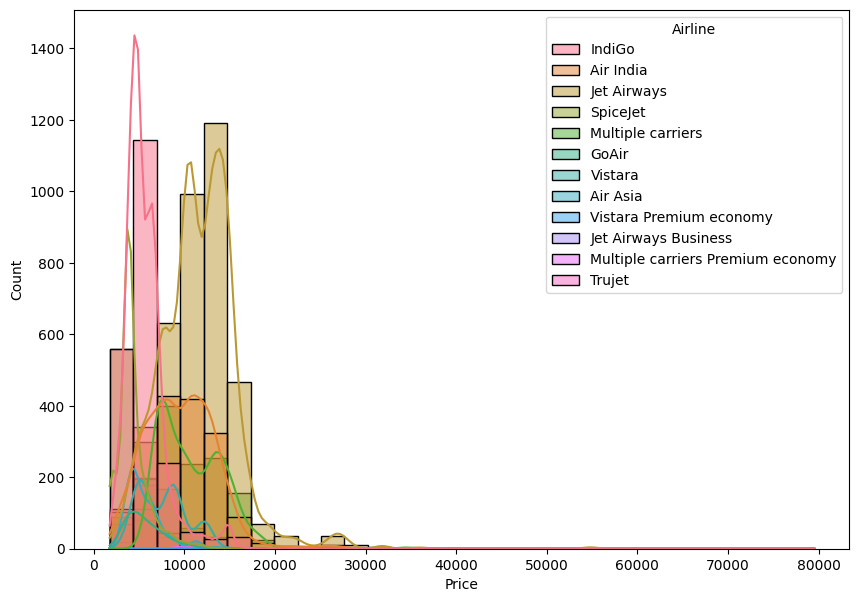

In [74]:
fig = plt.subplots(figsize= (10,7))
sns.histplot(data =df,x = df['Price'],kde = True ,hue = 'Airline',bins = 30)
plt.show()

# Answer 3 
### Range of the price and the Min And Max price

In [27]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


- #### The range of Price is between (1759.00, 79512.00)
- #### The Minimum Price is 1759.000000
- #### The Maximum Price is 79512.000000


---

# Answer 4 
### Price of Flight Vary with Airlines 




<Axes: xlabel='Airline', ylabel='Price'>

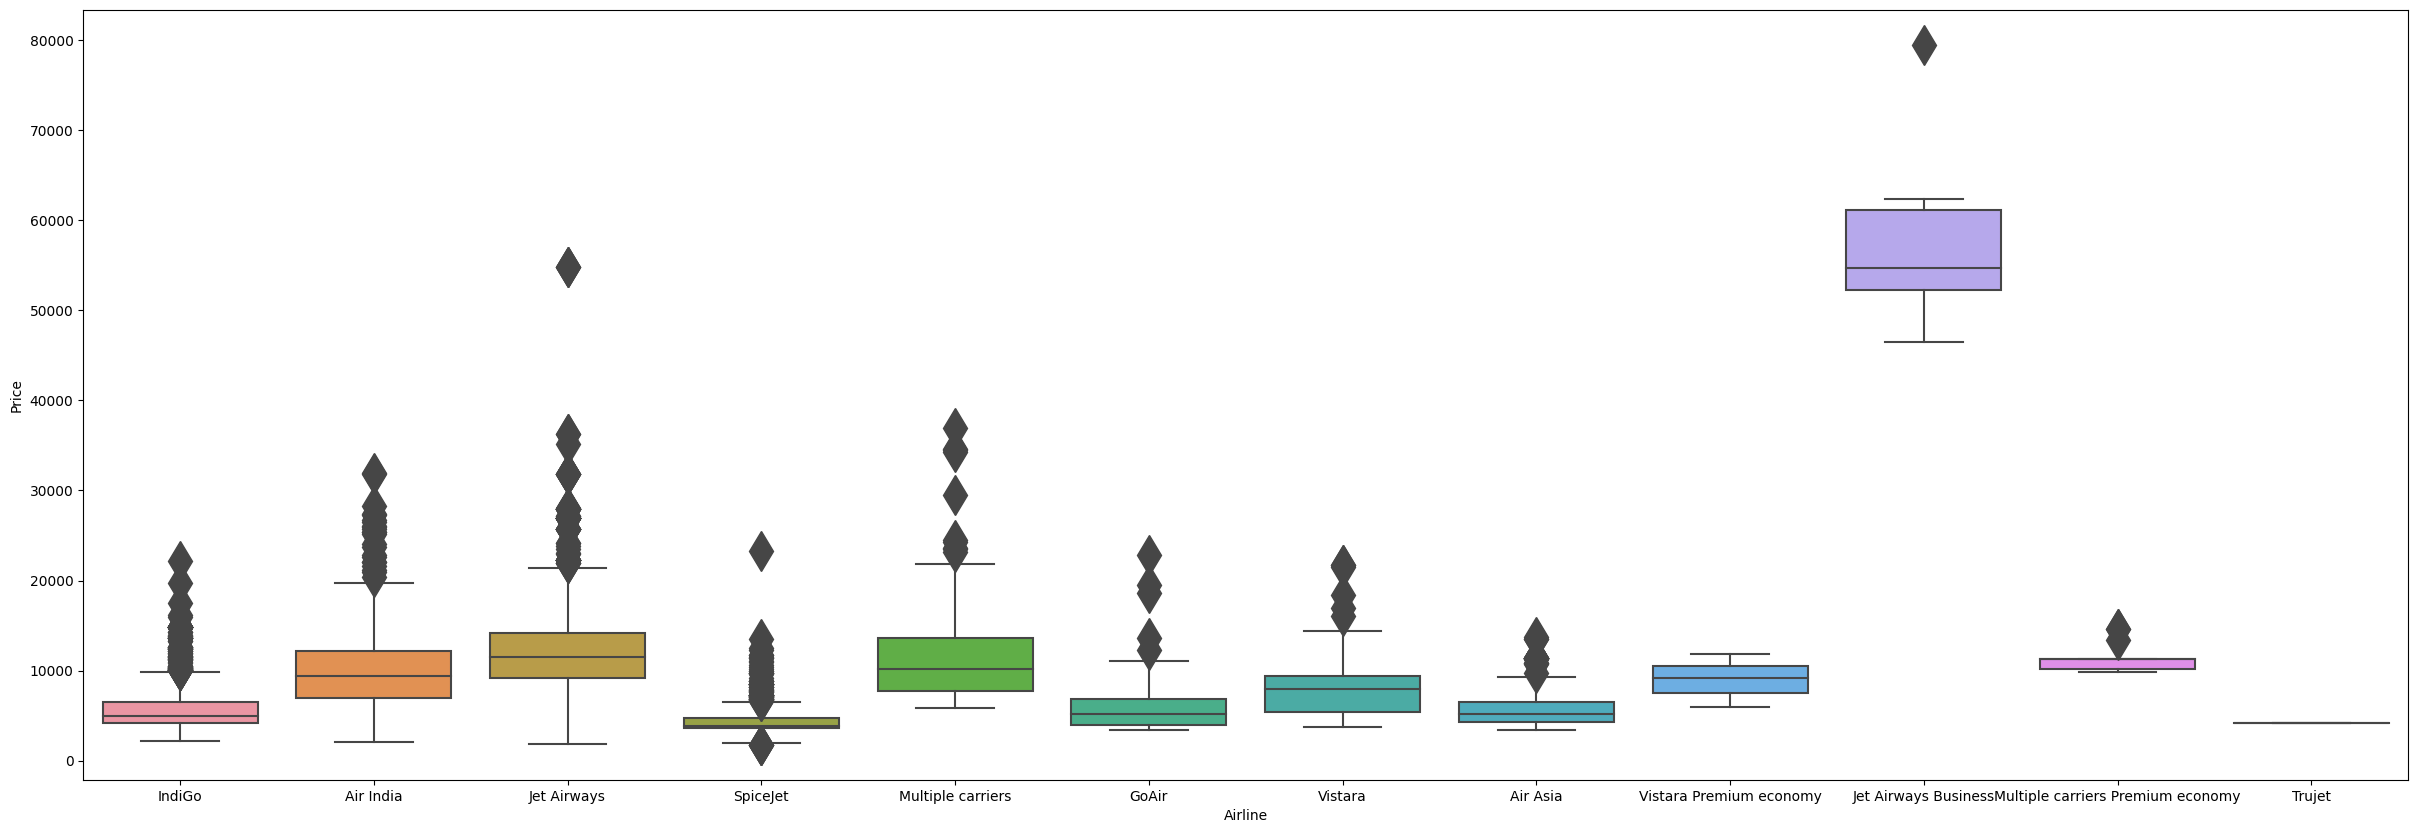

In [28]:
fig = plt.subplots(figsize = (30,10))
sns.boxplot(data=df, x="Airline", y="Price",fliersize = 20)

### Observation
-  Flight price is varying with Airlines
- jet Airways Bsiness Multiple have highest Price as comapred to other airlines
-  Trujet have lowest prrice

# Answer 5

<Axes: xlabel='Airline', ylabel='Price'>

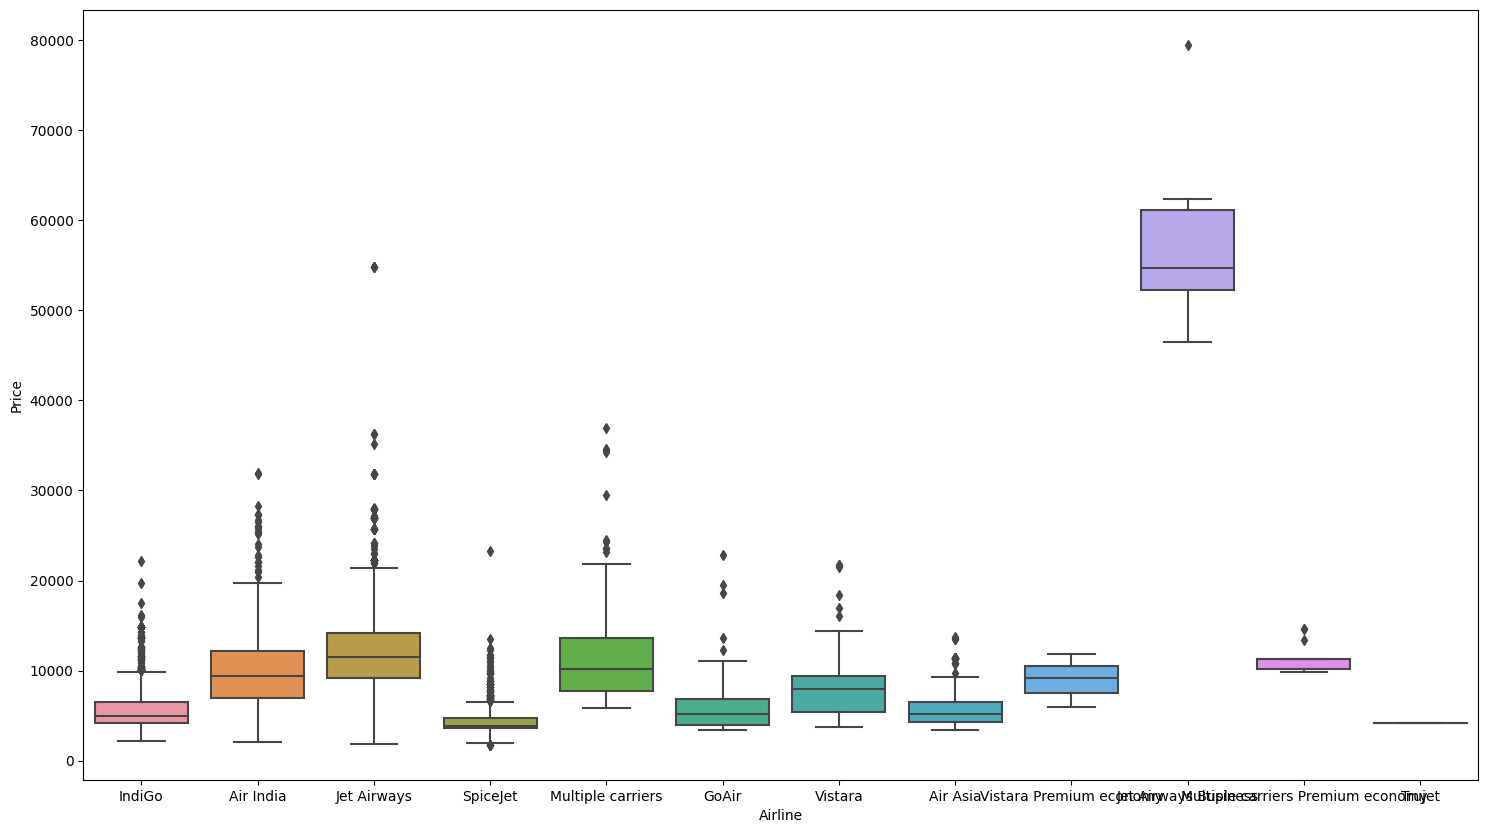

In [29]:
import plotly.express as px
import seaborn as sns
plt.subplots(1,1,figsize =(18,10))
sns.boxplot(df,x= 'Airline', y  ='Price')

### Insights:
- jet airways and , Airlindia,Spicejet and indigo have large number of outliiers in comaparison of other flights
- IF outlier are non- randomly distribute they can devrease normality
- They can also biased or influenced estimates
- outlier can impact the basic assumption of regression , ANNOVA and other, statical model assumption


## Answer 6

- To analyze the travel season  find months with most travel somwe have split the Dates to find months and then analyse to find the travel seasons

In [30]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [31]:
df['Date']=df['Date_of_Journey'].str.split('/').str[0].astype(int)
df['Month']=df['Date_of_Journey'].str.split('/').str[1].astype(int)
df['Year']=df['Date_of_Journey'].str.split('/').str[2].astype(int)

In [32]:
df['Month'].unique()

array([3, 5, 6, 4])

 there are four seasons/months vs price distrubution

<Axes: xlabel='Month', ylabel='Price'>

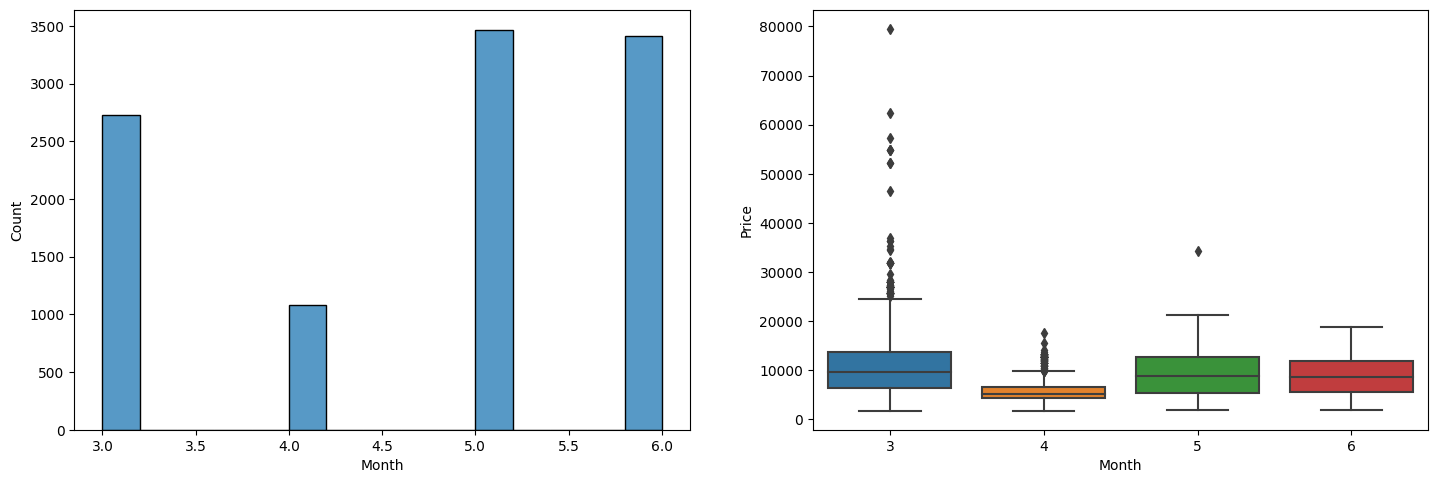

In [35]:
plt.subplots(1,2,figsize=(27,12))
plt.subplot(231)

warnings.filterwarnings('ignore')
sns.histplot(x = df['Month'])
plt.subplot(232)
sns.boxplot(x = df['Month'], y = df['Price'])


In [37]:
px.scatter(df,x= 'Airline',y='Price',color='Month')

Observation:
- Months 5 has highest number of the price datapoints
- Months 3 has the highers number of the maximum flight price
- Minths 3 has the highest number of the outliers


### All these make months 3 and 5 has the best travel months

## Answer 7


In [39]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019


In [41]:
df['src-des'] = df['Source']+"-"+df['Destination']

df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,src-des
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,Banglore-New Delhi
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,Kolkata-Banglore


In [43]:
## features which have less(say 15 categories)

for col in df.columns:
    if df[col].nunique() <=15:
        print(col,":" , df[col].unique())

Airline : ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Source : ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
Destination : ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
Total_Stops : ['non-stop' '2 stops' '1 stop' '3 stops' nan '4 stops']
Additional_Info : ['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Short layover' 'No Info' '1 Long layover' 'Change airports'
 'Business class' 'Red-eye flight' '2 Long layover']
Date : [24  1  9 12 27 18  3 15  6 21]
Month : [3 5 6 4]
Year : [2019]
src-des : ['Banglore-New Delhi' 'Kolkata-Banglore' 'Delhi-Cochin' 'Chennai-Kolkata'
 'Banglore-Delhi' 'Mumbai-Hyderabad']


## Visualization and their Analysis

- Line plot or Scatter plot
<center> flight price against
<center>vs
<center> Date of Journey:-

-------

### Statical Analysis:

1 Airline : Nominal
2 Source : Ordinal
3 Destination : Ordinal
4 Total Stops: Ordinal/Nomimal
5 src-des : Ordinal/Nomimal

- FOr Nomimal we can One Hot Encoding (OHE) or binary encoding 
-  for ordinal we can use label Encoding or targrt guided encoding


--------

-  Heatmap

Correlation betweeb different features

<Axes: xlabel='Destination', ylabel='Price'>

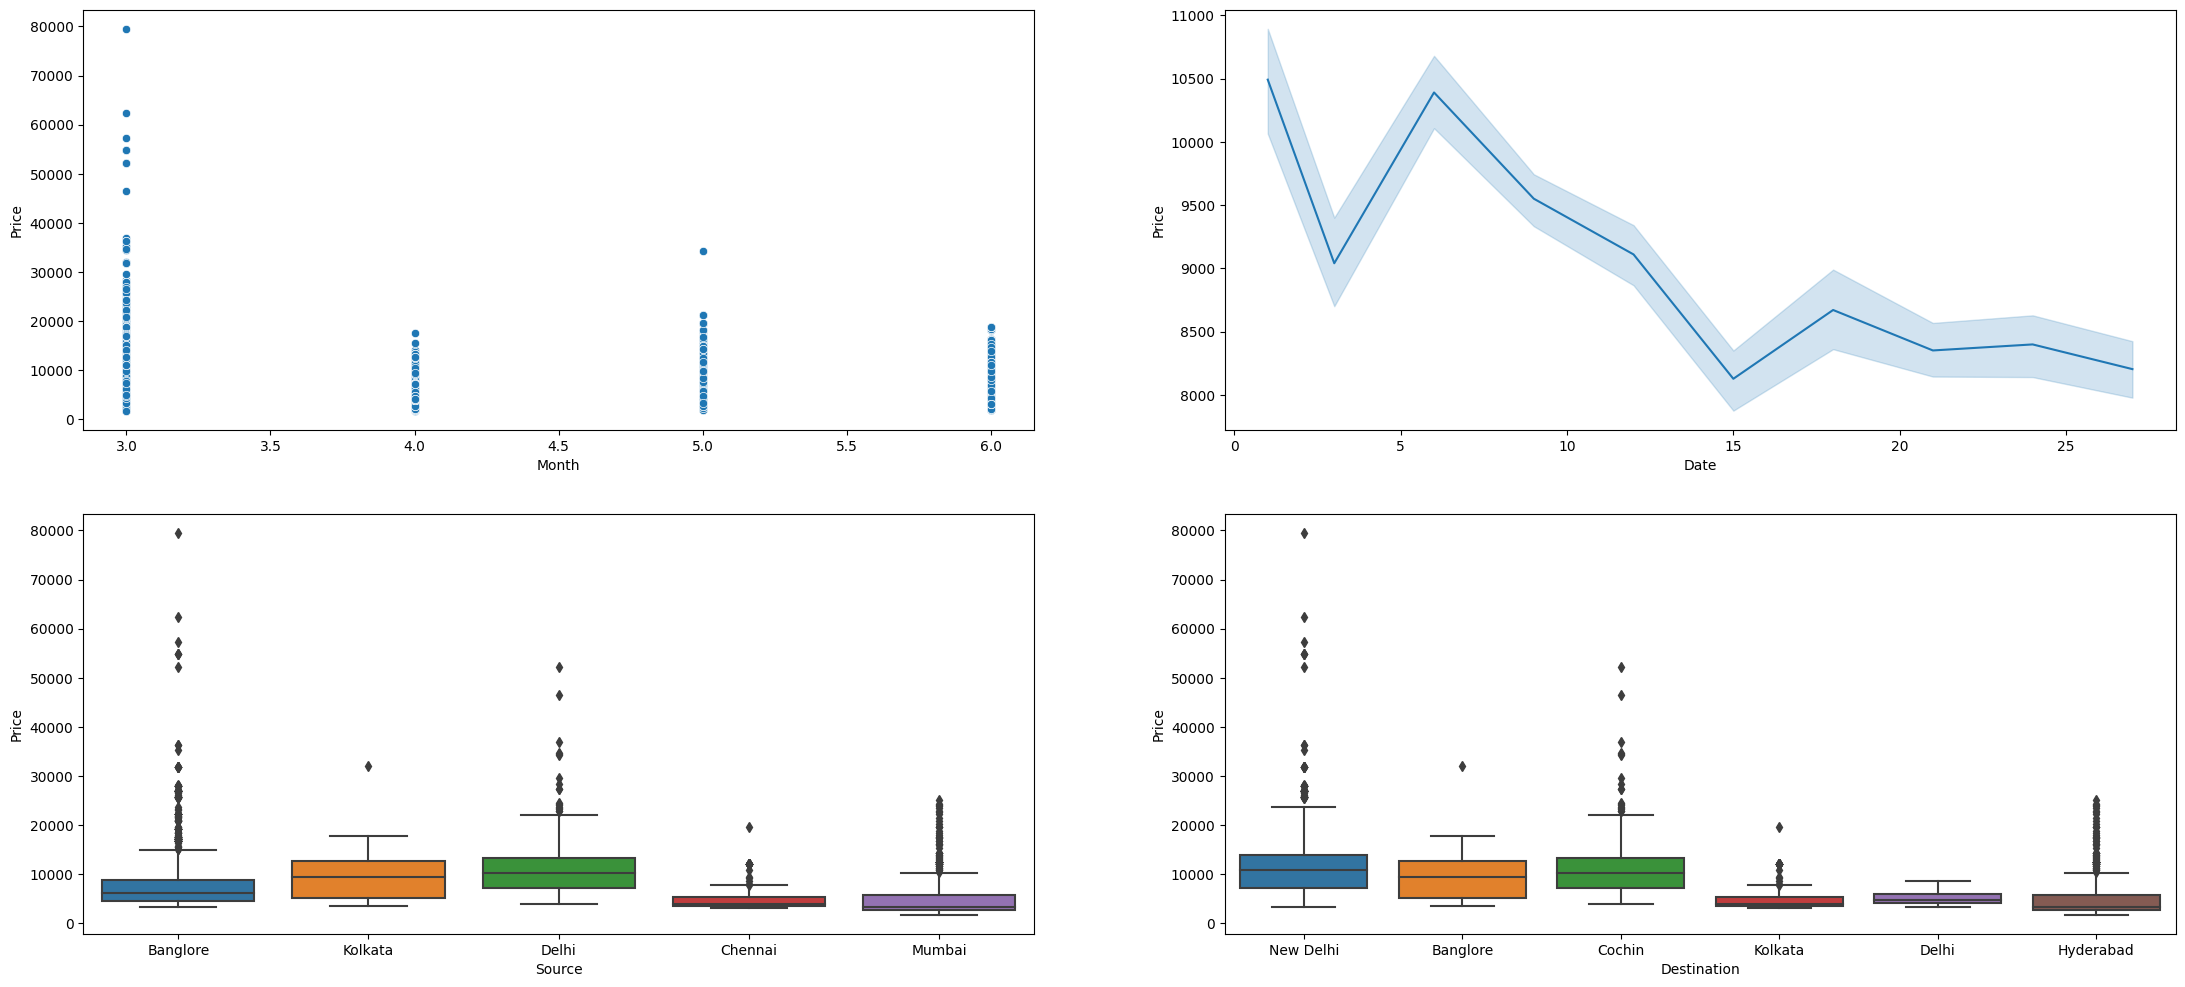

In [49]:
plt.subplots(2,2,figsize=(27,12))

plt.subplot(221)
sns.scatterplot(x=df['Month'],y=df['Price'])

plt.subplot(222)
sns.lineplot(x=df['Date'],y=df['Price'])

plt.subplot(223)
sns.boxplot(df,x='Source',y='Price')

plt.subplot(224)
sns.boxplot(df, x= 'Destination', y = 'Price')

---------

<Axes: xlabel='Month', ylabel='Count'>

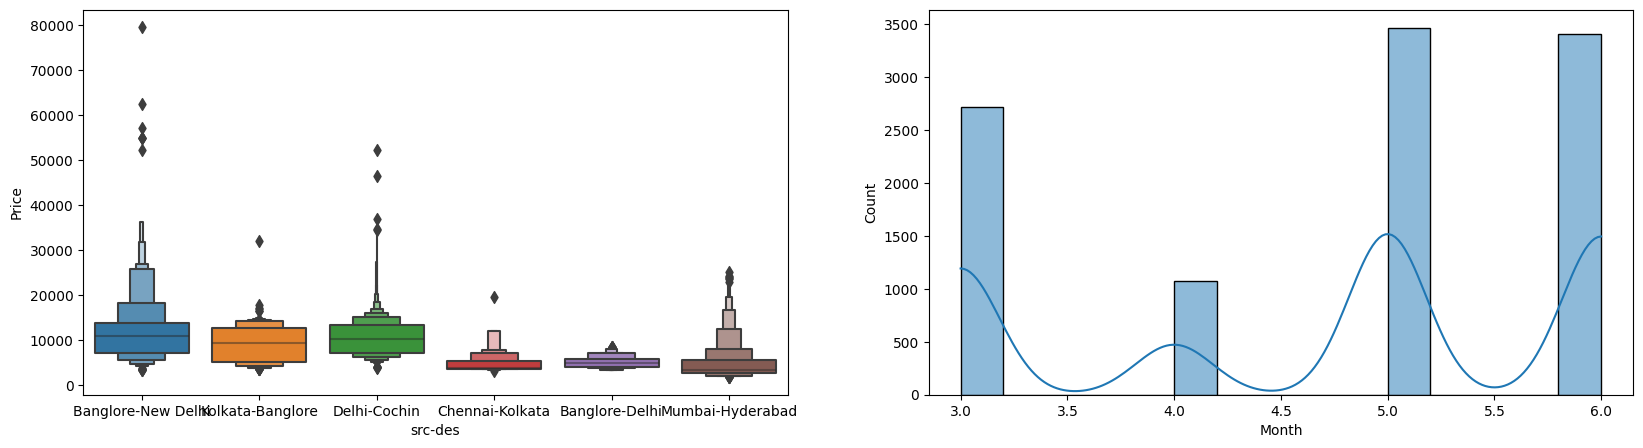

In [59]:
plt.subplots(1,2,figsize = (20,5))

plt.subplot(121)
sns.boxenplot(df, x = 'src-des', y = 'Price')
plt.subplot(122)
sns.histplot(df, x= 'Month', kde= True)

In [60]:
from sklearn import preprocessing 

ohe=preprocessing.OneHotEncoder()
le=preprocessing.LabelEncoder()

In [62]:
# 'Airline', nominal -- ohe
# 'Source', ordinal  -- label
# 'Destination', ordinal  --label
# 'Total_Stops', ordinal/nominal  --ohe
# 'src-des' ordinal/nominal  --label

# make a new df with features which are supposed to be most affect the flight price based on above visualisations
df_new=df[['Airline','Source','Destination','Total_Stops','src-des','Month','Price']].copy()
     


In [63]:

# apply encoding ohe
encoded=ohe.fit_transform(df_new[['Airline','Total_Stops']])
encoded_df=pd.DataFrame(encoded.toarray(),columns=ohe.get_feature_names_out())
df_new=pd.concat([df_new,encoded_df],axis=1)

In [64]:

# apply encoding lable
df_new['Source']=le.fit_transform(df_new[['Source']])
df_new['Destination']=le.fit_transform(df_new[['Destination']])
df_new['src-des']=le.fit_transform(df_new[['src-des']])

In [65]:

df_new.drop(['Airline','Total_Stops'],axis=1,inplace=True)
     

<Axes: >

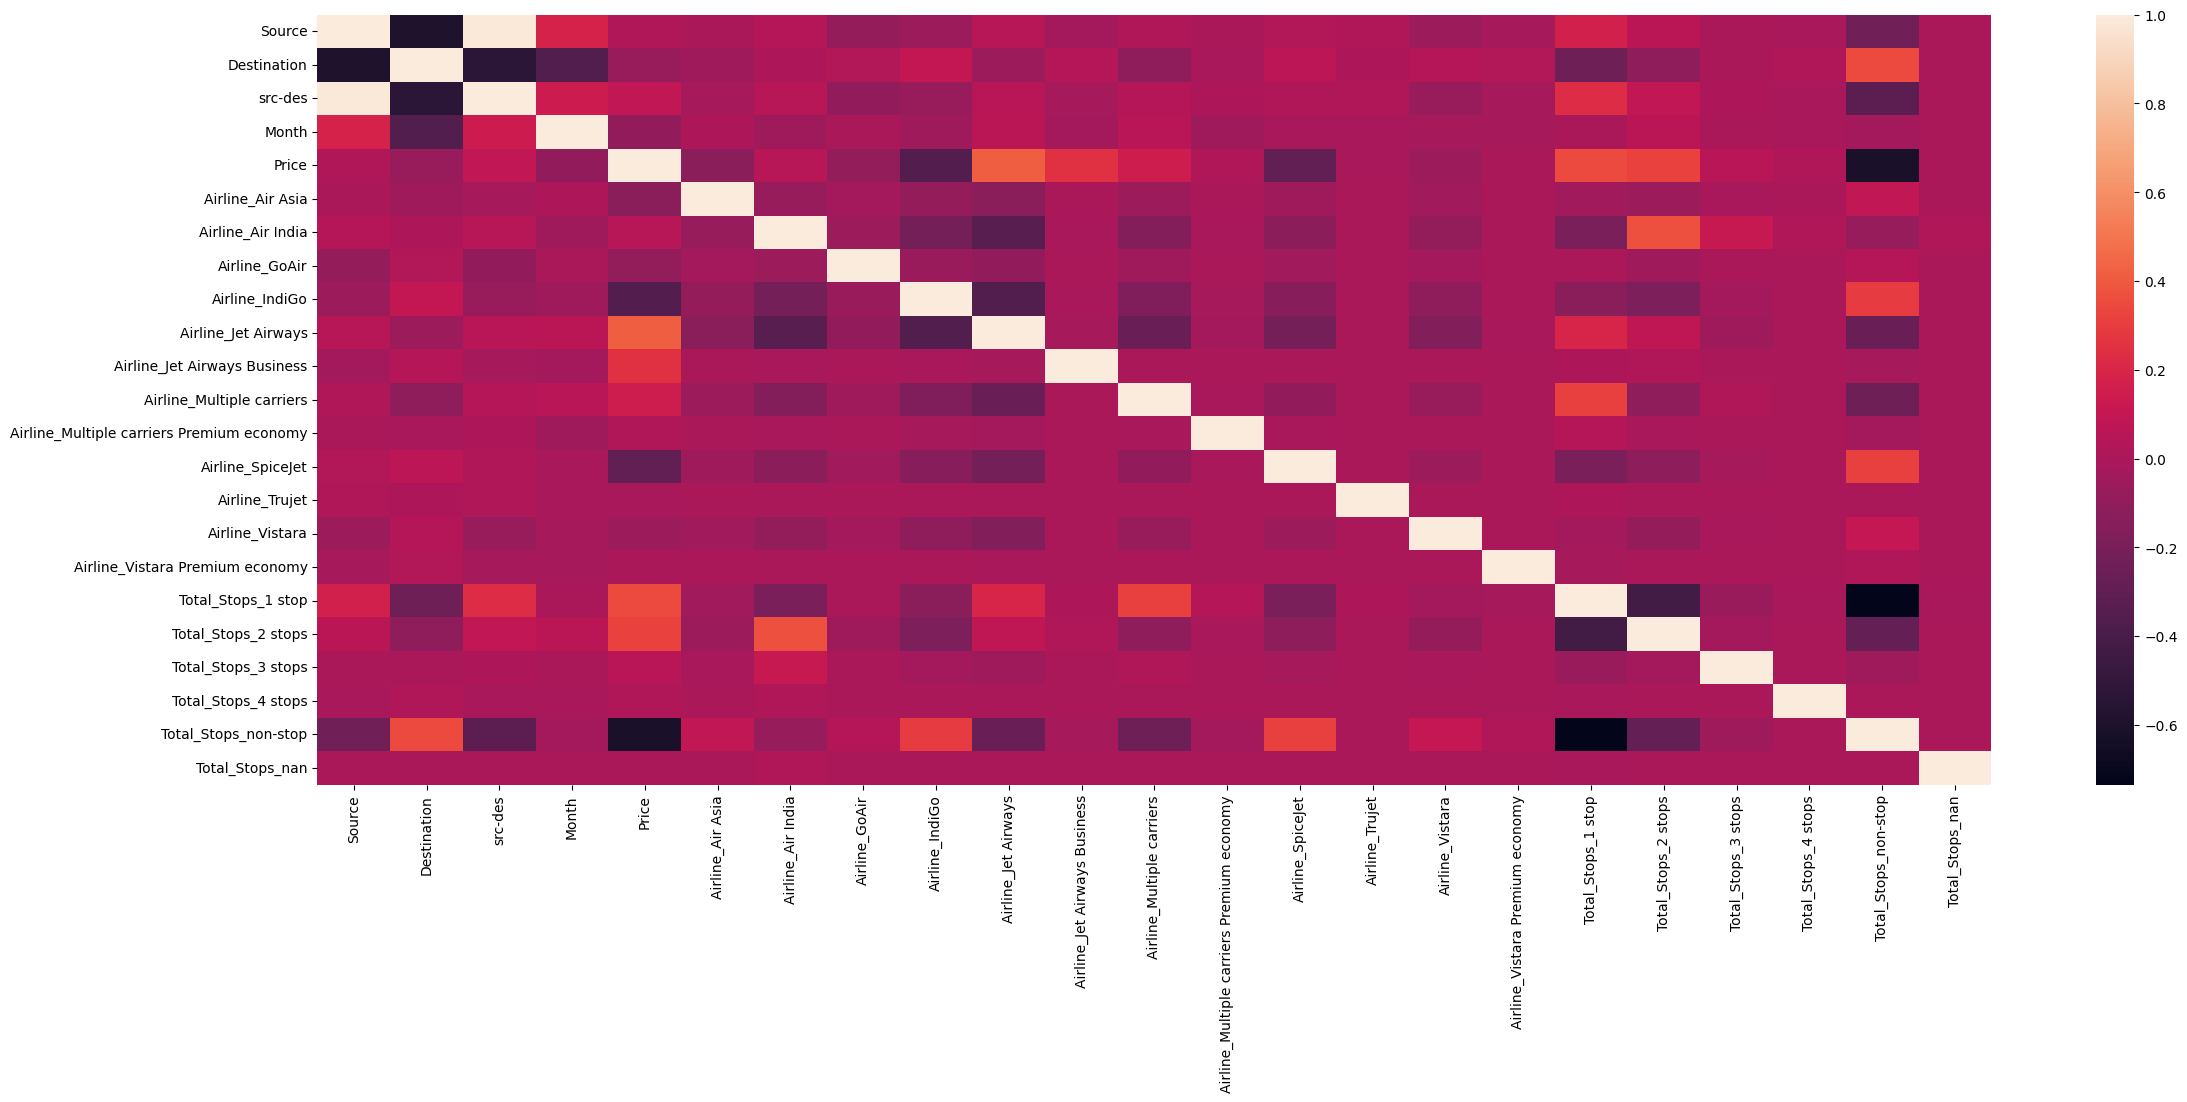

In [66]:

corr=df_new.corr(method='pearson')
# plot the heatmap to observe correlation between the features
plt.subplots(1,1,figsize=(27,10))

plt.subplot(111)
sns.heatmap(corr)

Final Observations:

- In month 3, there has been a very high flight prices compared to other months
as the days increases i.e from the beginning of month to the end, the flight prices keep falling
- The Flight prices of the following routes(source-destnation) is higher than other routes:
- Bangalore-New delhi
- Kolkata-Bangalore
- Delhi-Cochin
- These high prices can be attributed to their long distances.

## Answer 8

From the graphs, correlation table and observetions in previous answer, we can make inferences for the factors affecting the flight prices in the dataset:-|

In [68]:
df.corr()

,Price,Date,Month,Year
Price,1.000000,-0.153738,-0.103651,NaN
Date,-0.153738,1.000000,-0.038378,NaN
Month,-0.103651,-0.038378,1.000000,NaN
Year,NaN,NaN,NaN,NaN


In [70]:
df_new.describe()

,Source,Destination,src-des,Month,Price,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,...,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Total_Stops_1 stop,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop,Total_Stops_nan
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,...,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,1.952261,1.436113,2.833848,4.708602,9087.064121,0.029861,0.163999,0.018160,0.192174,0.360292,...,0.076570,0.000094,0.044838,0.000281,0.526537,0.142282,0.004212,0.000094,0.326781,0.000094
std,1.177221,1.474782,1.397368,1.164357,4611.359167,0.170210,0.370292,0.133535,0.394028,0.480108,...,0.265921,0.009675,0.206957,0.016756,0.499319,0.349356,0.064768,0.009675,0.469058,0.009675
min,0.000000,0.000000,0.000000,3.000000,1759.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000,3.000000,5277.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,3.000000,5.000000,8372.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,2.000000,4.000000,6.000000,12373.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,4.000000,5.000000,5.000000,6.000000,79512.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Form the inference/observations, heatmap and corr dataframe(correlation data) in the previous answer(answer 7) , we have the following factors that affect flight prices:

- month 5 and 6 have large number of flights taking off
- from the heatmap, we observe that the flight price is coorrelated to these features most significantly:
- non stop flight: -52.39%
- Airline Indigo: -31.15%
- Airline Spicejet: -26%
- Airline Asia : -10.52%
- month: -10.36%
- Airline Multiple Carriers: 11.95%
- Jet Airways Business: 17.61%
- 2 stops: 26.225
- 1 stop: 29.855
- Airline Jet Airways: 36.37%
-   - as the number of non stop flights decrases the flight prices increases

- The mean price is 
1759 and maximum price is $79512.

--------------

# <center>  Google Play Store Data Analysis

In [75]:
## Answer 9
## loading the dataset

In [86]:

df2=pd.read_csv('googleplaystore.csv')

In [87]:
df2.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [88]:
df2.shape

(10841, 13)

- Drop Duplicates

In [89]:
df2.drop_duplicates(inplace=True)

In [90]:
df2.shape

(10358, 13)

without duplicates it has 10358 rows and 13 columns


## Answer 10


In [92]:
# checking the unique categories
df2['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

<Axes: xlabel='Category', ylabel='Rating'>

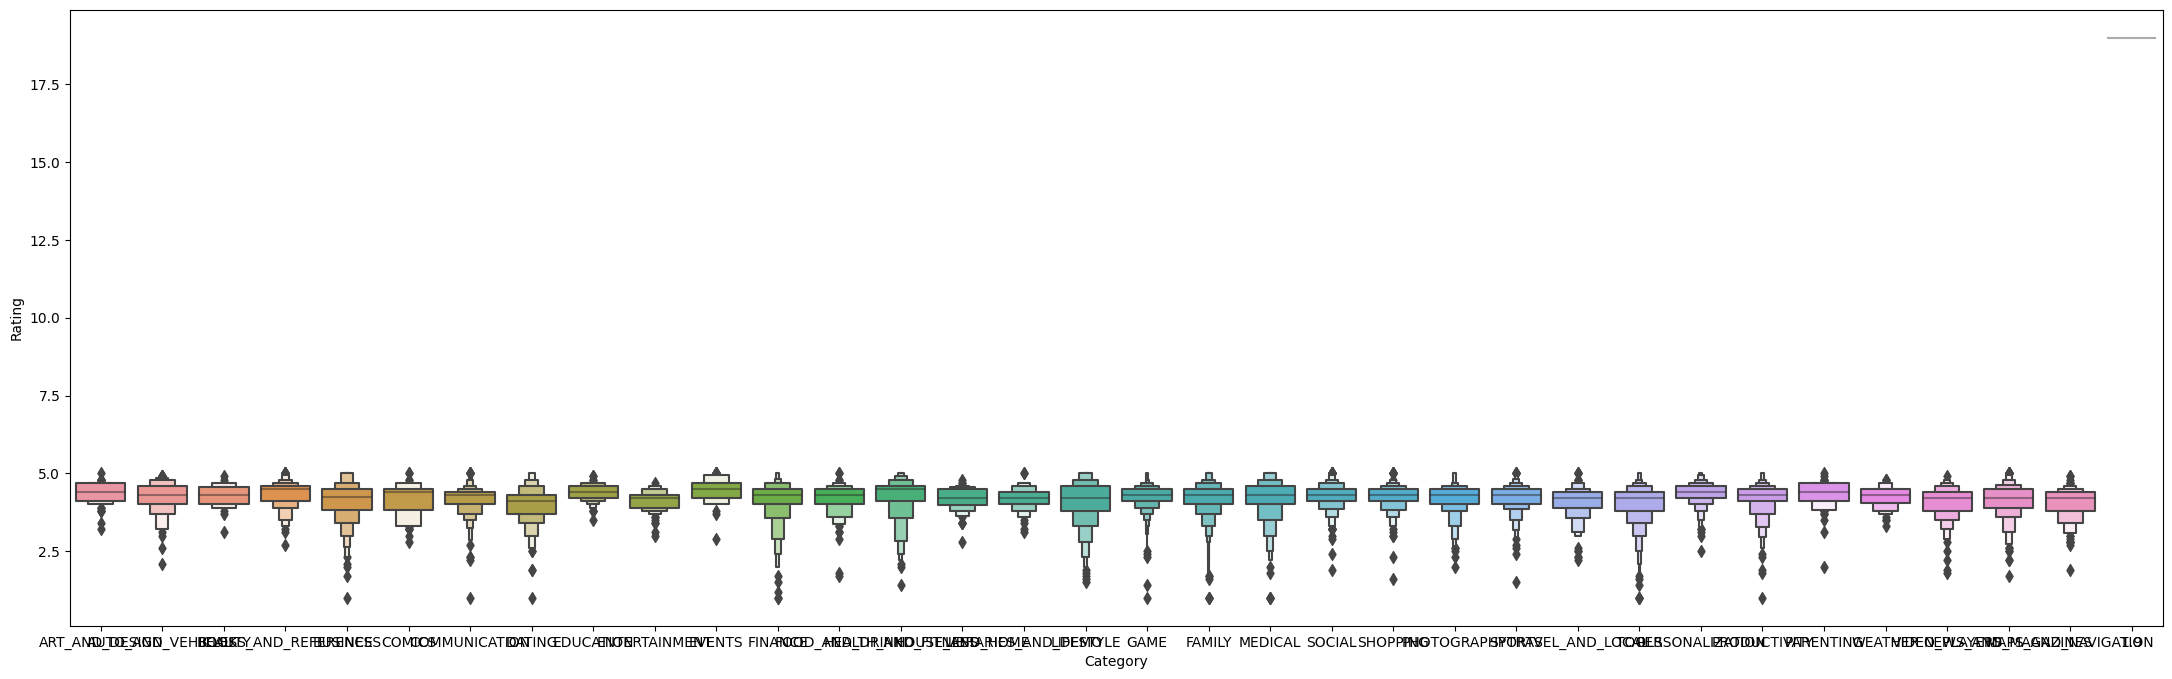

In [98]:
plt.subplots(1,1,figsize = (27,8))

sns.boxenplot(df2, x= "Category", y = 'Rating')

## Answer 11

- There are 1474 missing ratings and a few missing values in type, content rating, current ver, android ver

### The missing values impact our data analysis in the following ways:

- Reducing the Sample Size: it makes it difficult to draw any meaningful conclusions or perform accurate statistical analyses.

- Biased Results: It introduce bias into the data analysis.

- Incomplete Conclusions: We cannot draw complete conclusions. For instance, if a variable has many missing values, it may be challenging to determine its relationship with other variables in the dataset.

- Incorrect Statistical Models:It leads to incorrect statistical models.

    -   If the missing values are not handled correctly, the model may overestimate or underestimate the effect of the variable on the outcome.

--------

In [100]:
df2.isnull().sum()


App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [101]:
df2['Rating'].median()

4.3

In [102]:
# Group the data by category and get the mean rating for each category
category_mean = df2.groupby('Category')['Rating'].mean()

# Fill the missing values in the ratings column with the mean rating of their respective category
df2['Rating'] = df2.groupby('Category')['Rating'].apply(lambda x: x.fillna(x.mean()))
     

In [103]:

# drop the other missing values as they are very few in comparison to the original dataset
df2.dropna(inplace=True)
df2.isnull().sum()
# df2.shape

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

## Answer 12



In [109]:
df2=pd.read_csv('googleplaystore.csv')

In [110]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [111]:
# df2.info()
# df2.head(2)
# df2['Size'].unique()
# we have size in Mb and kb so we transform to numrical data for analysis according to 1Mb=1024kb
x=0

for i in df2['Size']:
  if i.find('M')!=-1:
    i=i.replace('M',"")
    df2.loc[x,'Size']=float(i)*1024
  elif i.find('k')!=-1:
    i=i.replace("k","")
    df2.loc[x,'Size']=float(i)
  else:
    df2.loc[x,'Size']=None
  x+=1

In [112]:
df2['Size'].fillna(method='ffill',inplace=True)

# Group the data by category and get the mean rating for each category
category_mean = df2.groupby('Category')['Rating'].mean()
# Fill the missing values in the ratings column with the mean rating of their respective category
df2['Rating'] = df2.groupby('Category')['Rating'].apply(lambda x: x.fillna(x.mean()))
# drop the other missing values as they are very few in comparison to the original dataset
df2.dropna(inplace=True)
# df2.isnull().sum()

## Scatter plot 

Text(0.5, 0, 'The size is in kb')

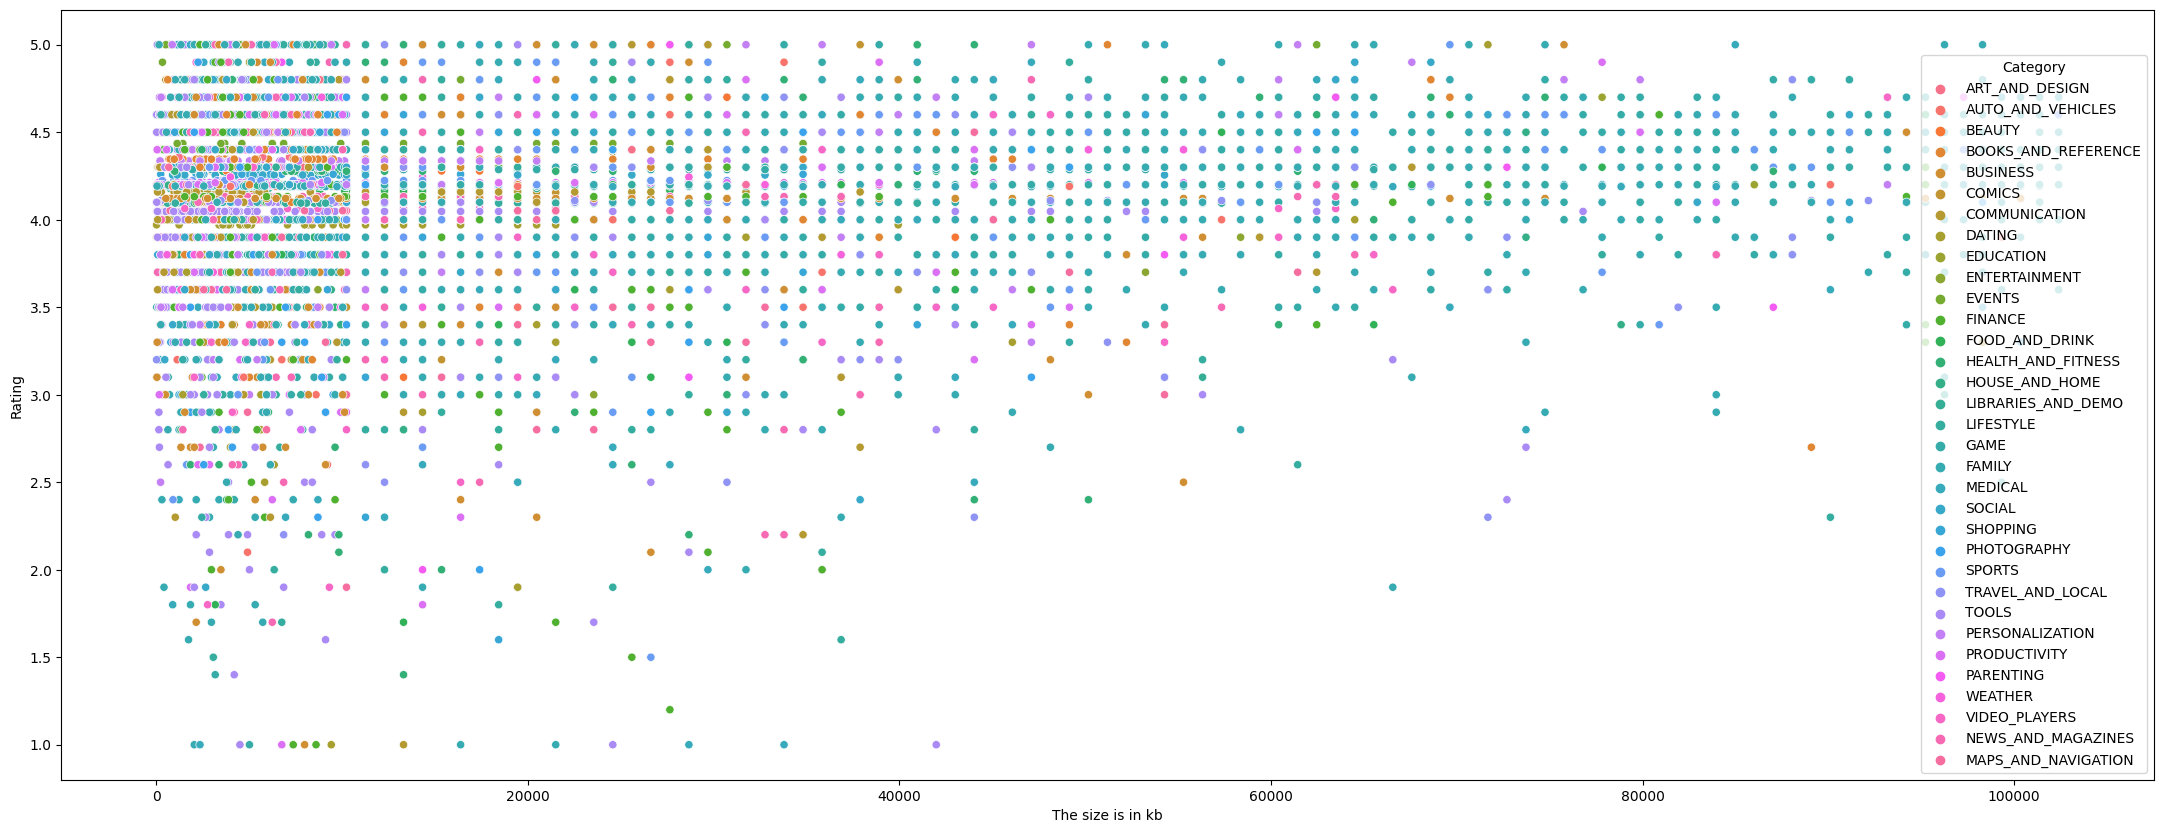

In [113]:

plt.subplots(1,1,figsize=(27,10))

plt.subplot(111)
sns.scatterplot(df2,x='Size',y='Rating',hue='Category')
plt.xlabel('The size is in kb')

### Observations:
- There is a very large number of apps with small sizes
the small size apps have higher number of good(maximum ratings).
- A very large number of small size apps between 0 to 10000kb have ratings between 4 and 4.5
- The family and games category has the highest number of apps and so has the highest number of ratings(data points)

----------

## Answer 13



In [114]:
# df2.info()
# df2.head(2)
# df2['Price'].unique()

df2['Price'] = df2['Price'].str.replace("$","").astype('float')

Text(0, 0.5, 'In Dollars')

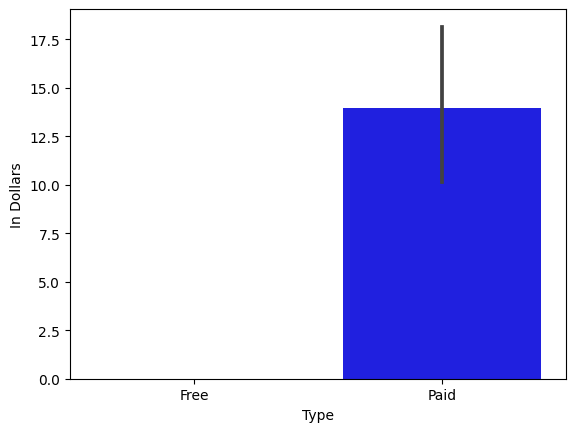

In [116]:

ax=sns.barplot(df2,x='Type',y='Price', color = 'blue')
ax.set_ylabel('In Dollars')

## Answer 14 



In [117]:
chars=['+',',','$']
for x in chars:
  df2['Installs']=df2['Installs'].str.replace(x,'')

df2['Installs'] = df2['Installs'].astype('int')

Text(0.5, 1.0, 'Most Popular Categories in Play Store')

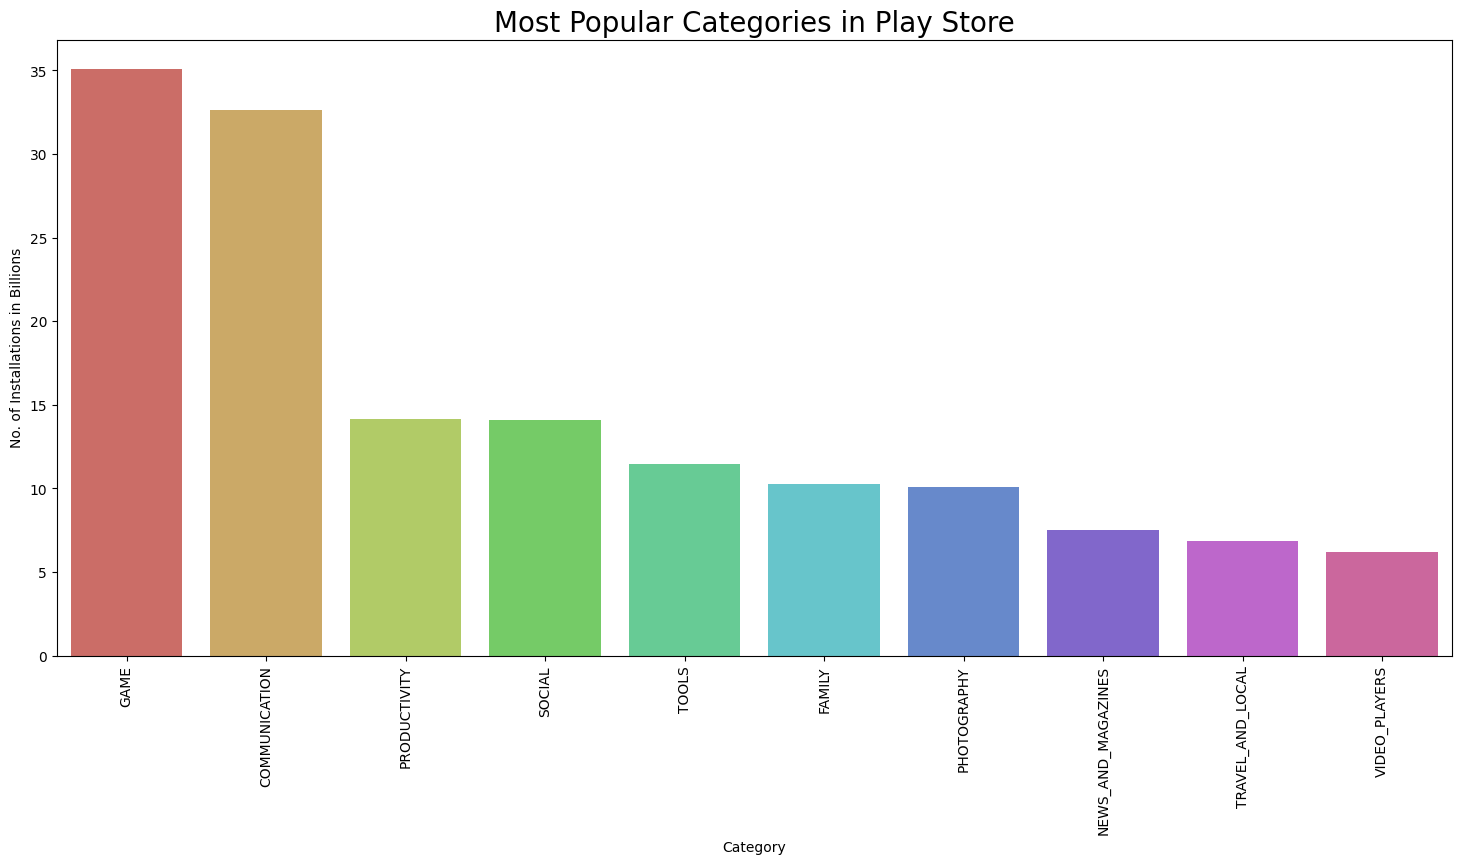

In [118]:

df_cat_installs = df2.groupby(['Category'])['Installs'].sum().sort_values(ascending = False).reset_index()
df_cat_installs.Installs = df_cat_installs.Installs/1000000000# converting into billions
df3 = df_cat_installs.head(10)


plt.figure(figsize = (18,8))
ax = sns.barplot(x = 'Category' , y = 'Installs' , data = df3,palette='hls' )
plt.xticks(rotation=90)
ax.set_ylabel('No. of Installations in Billions')
# ax.set_xlabel('')
ax.set_title("Most Popular Categories in Play Store", size = 20)

In [119]:

# frequency table: Installs in billions
print(df3.loc[:10,['Category','Installs']])

             Category   Installs
0                GAME  35.086024
1       COMMUNICATION  32.647276
2        PRODUCTIVITY  14.176091
3              SOCIAL  14.069868
4               TOOLS  11.452272
5              FAMILY  10.258203
6         PHOTOGRAPHY  10.088248
7  NEWS_AND_MAGAZINES   7.496318
8    TRAVEL_AND_LOCAL   6.868887
9       VIDEO_PLAYERS   6.222003


Answer 15
- From the bar chart in the previous answer, we have some obervations like the number ofinstallations is amximum for games and communication apps.

1 So, it would be beneficial to invst in some gaming or communication category apps.


----------

Also from the scatter plot in answer 12, we observe

- There is a very large number of apps with small sizes
the small size apps have higher number of good(maximum ratings).
- A very large number of small size apps between 0 to 10000kb have ratings between 4 and 4.5
- The family and games category has the highest number of apps and so has the highest number of ratings(data points)
2 So, we can say that new app should have less size to perform better.

-----

## answer 15
- From the bar chart in the previous answer, we have some obervations like the number ofinstallations is amximum for games and communication apps.

- So, it would be beneficial to invst in some gaming or communication category apps.
Also from the scatter plot in answer 12, we observe

There is a very large number of apps with small sizes
the small size apps have higher number of good(maximum ratings).
A very large number of small size apps between 0 to 10000kb have ratings between 4 and 4.5
The family and games category has the highest number of apps and so has the highest number of ratings(data points)
So, we can say that new app should have less size to perform better.

-------

However, before having a final inference , we would analyse some more graphs like:

- Highest number of type of apps(paid or free) present on the playstore
- Highest number of category of apps present on the playstore
type of apps vs categories (which category of apps have high number of paid/free apps)
- also we can find trends between sizes and prices installs vs sizes/price price/type vs reviews
Hence.

-------


## answer 16
From the graphs and observations in previous answer (answer 15), we infer that the most succesfull app developers are most probably the games and communications app developers. Also the developers who make small size apps perform better.

-------

## answer 17

The given data set does not contain any launch data feature, but we can use the Last Updated feature to finnd the best time to launch a new app.

In [120]:
df2.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [121]:

df2.loc[0:1,'Last Updated'].str.split(" ")

0     [January, 7,, 2018]
1    [January, 15,, 2018]
Name: Last Updated, dtype: object

In [122]:

df2.loc[0:1,'Last Updated'].str.split(" ")[0][0]

'January'

In [123]:

def mtn(x):
    months = {
        'jan': 1,
        'feb': 2,
        'mar': 3,
        'apr': 4,
         'may':5,
         'jun':6,
         'jul':7,
         'aug':8,
         'sep':9,
         'oct':10,
         'nov':11,
         'dec':12
        }
    a = x.strip()[:3].lower()
    try:
        ez = months[a]
        # print (ez)
        return ez
    except:
        # raise ValueError('Not a month')
        return 0

In [124]:

df2['Last Updated']=df2['Last Updated'].str.replace(',',"")

tmp_df=pd.DataFrame()

tmp_df['Month']=df2['Last Updated'].str.split(" ")
tmp_df['m']=tmp_df['Month'].loc[:].str[0]
tmp_df['m']
tmp_df['d']=tmp_df['Month'].loc[:].str[1]
tmp_df['d']=tmp_df['d'].astype(int)
tmp_df['y']=tmp_df['Month'].loc[:].str[2]
tmp_df.head(2)
     

,Month,m,d,y
0,"[January, 7, 2018]",January,7,2018
1,"[January, 15, 2018]",January,15,2018


In [125]:

tmp_df['m'].unique()

array(['January', 'August', 'June', 'March', 'April', 'September', 'July',
       'October', 'November', 'May', 'December', 'February'], dtype=object)

In [126]:

# month to corresponding int month
tmp_df['m']=tmp_df['m'].apply(mtn)
     

In [127]:

tmp_df['y']=tmp_df['y'].astype(int)

In [128]:

# appending the temporary df to original df having only required features
df2=pd.concat([df2,tmp_df],axis=1)

In [129]:

df2.drop(['Month','Current Ver'],axis=1,inplace=True)
df2.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Android Ver,m,d,y
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000,Free,0.0,Everyone,Art & Design,January 7 2018,4.0.3 and up,1,7,2018


Text(0.5, 0, 'Month')

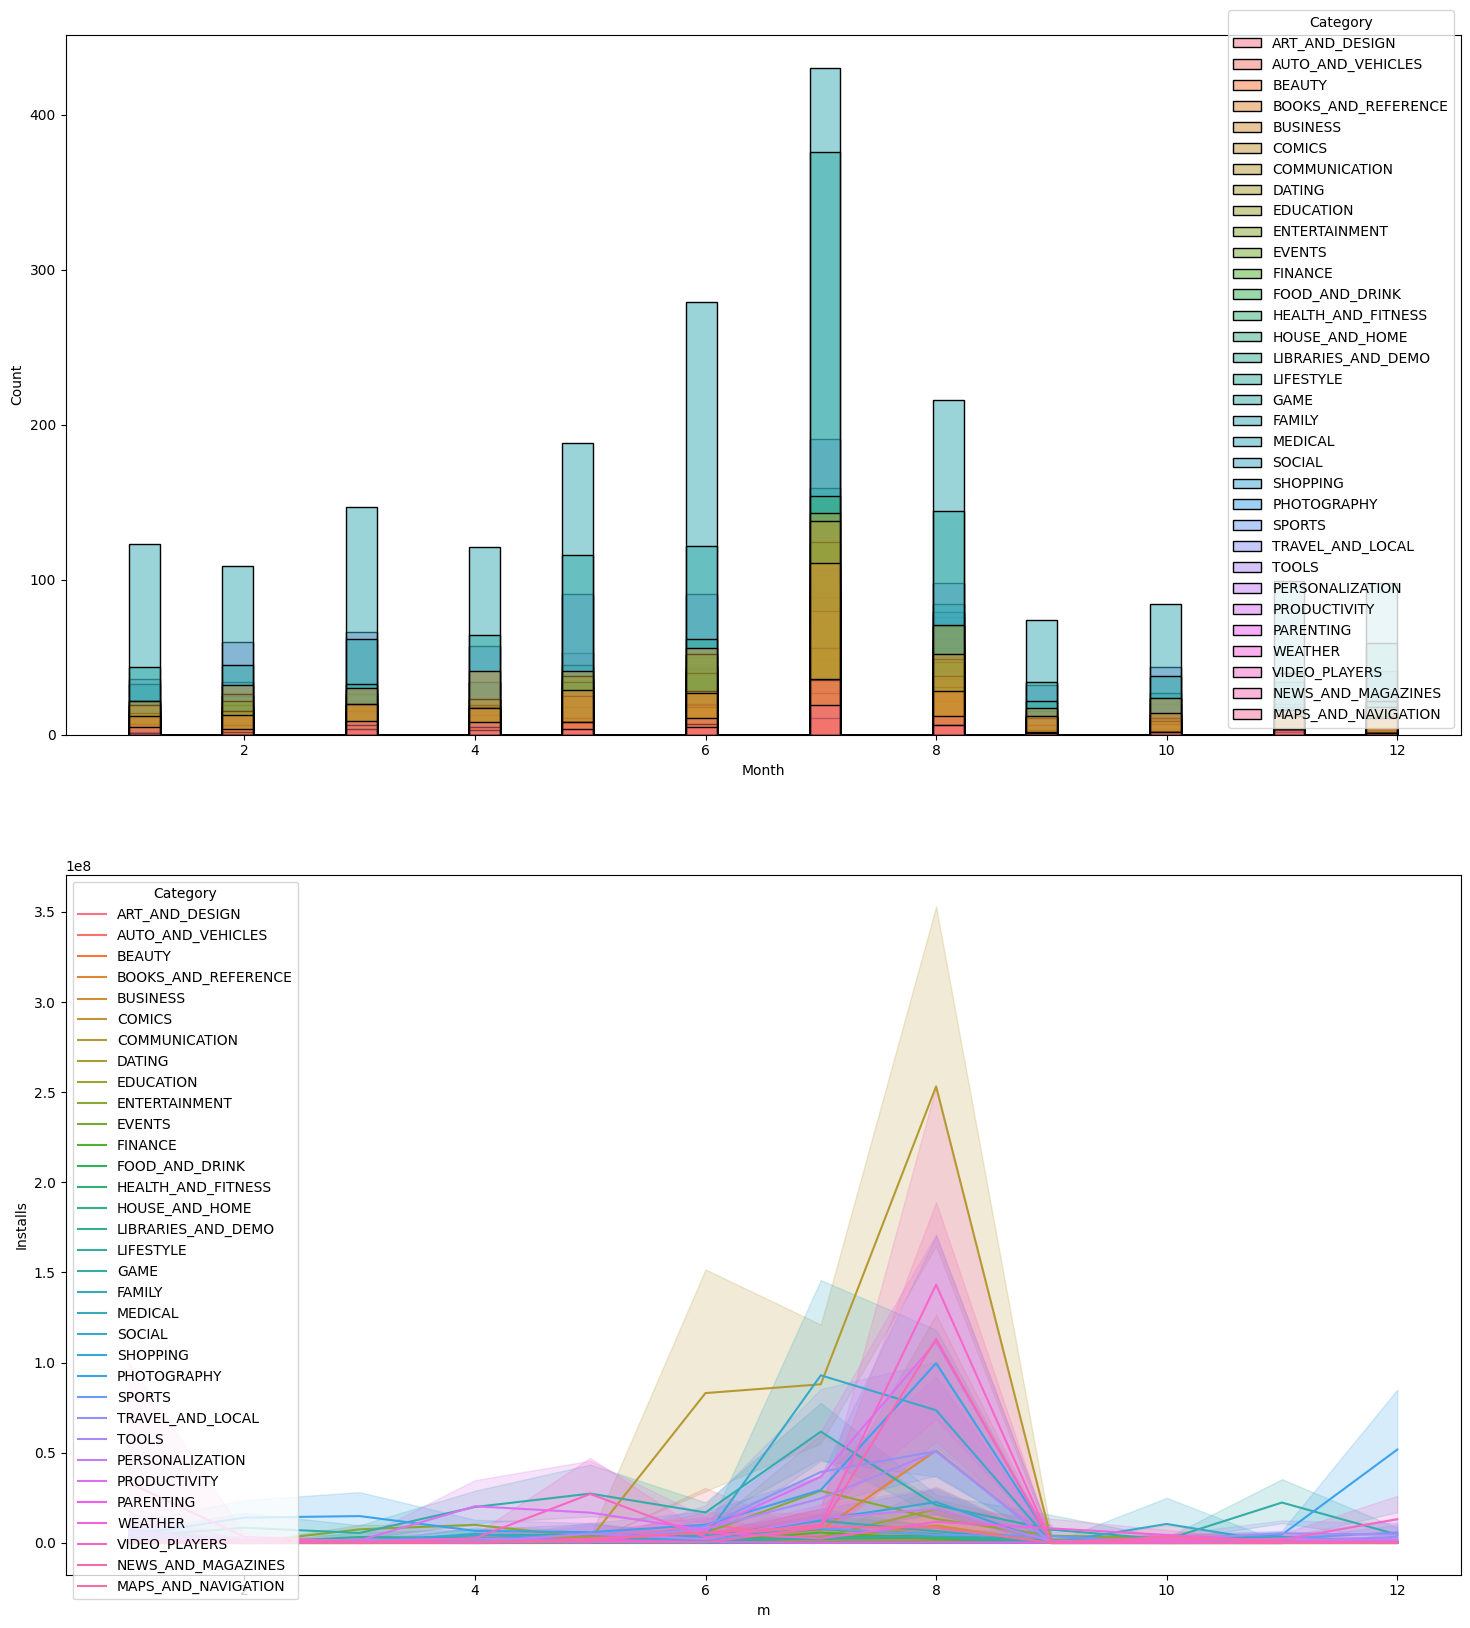

In [130]:
plt.subplots(2,1,figsize=(18,20))

# most apps updated in which month and what category apps were most updated
plt.subplot(211)
ax=sns.histplot(df2,x='m',hue='Category')
ax.set_xlabel('Month')

# most installed apps in which month and what category
plt.subplot(212)
sns.lineplot(df2,x='m',y='Installs',hue='Category')
ax.set_xlabel('Month')

Text(0.5, 0, 'Year')

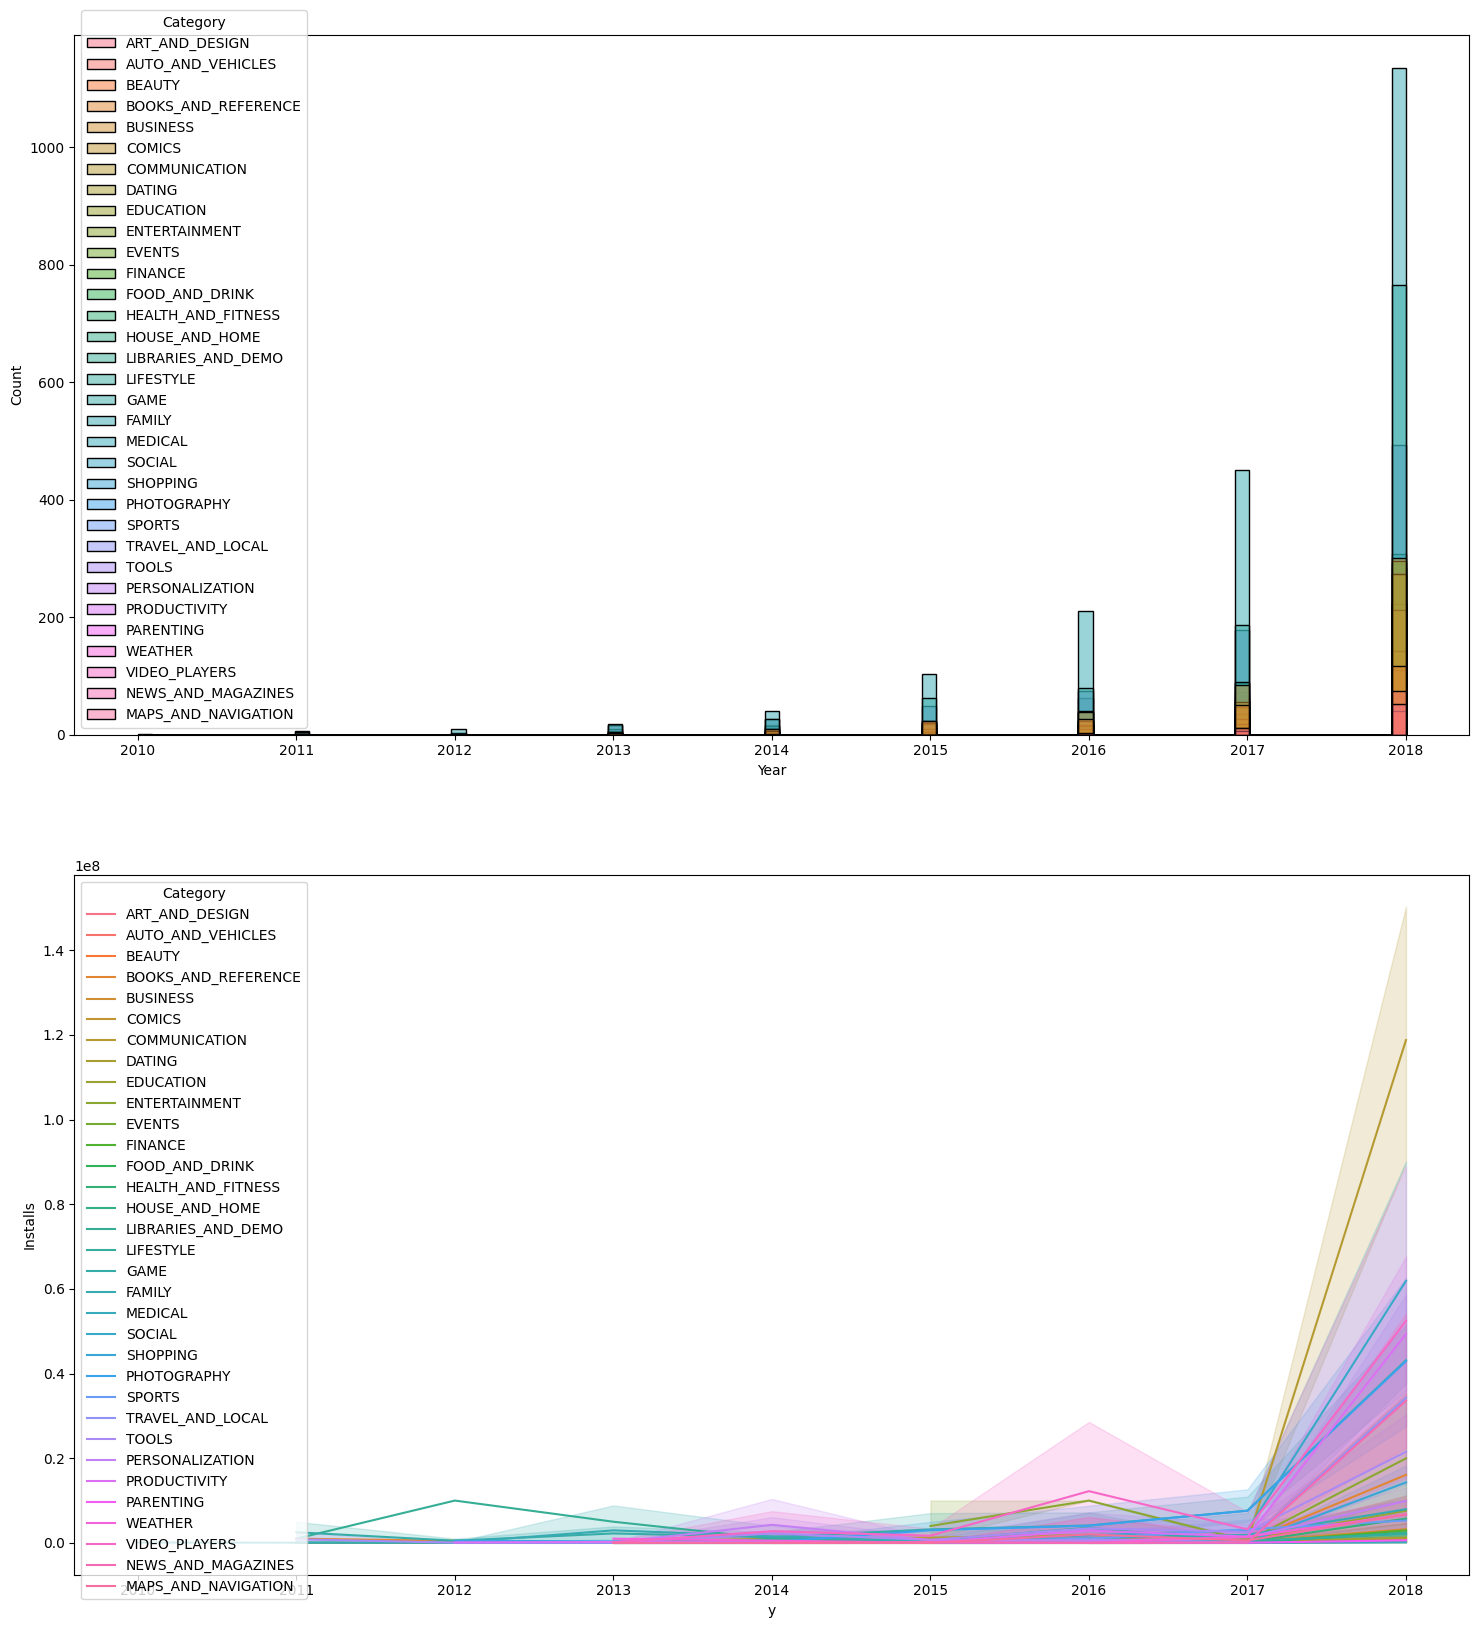

In [131]:
plt.subplots(2,1,figsize=(18,20))

# most apps updated in which year and what category apps were most updated
plt.subplot(211)
ax=sns.histplot(df2,x='y',hue='Category')
ax.set_xlabel('Year')

# most installed apps in which year and what category
plt.subplot(212)
sns.lineplot(df2,x='y',y='Installs',hue='Category')
ax.set_xlabel('Year')

Text(0.5, 0, 'Day')

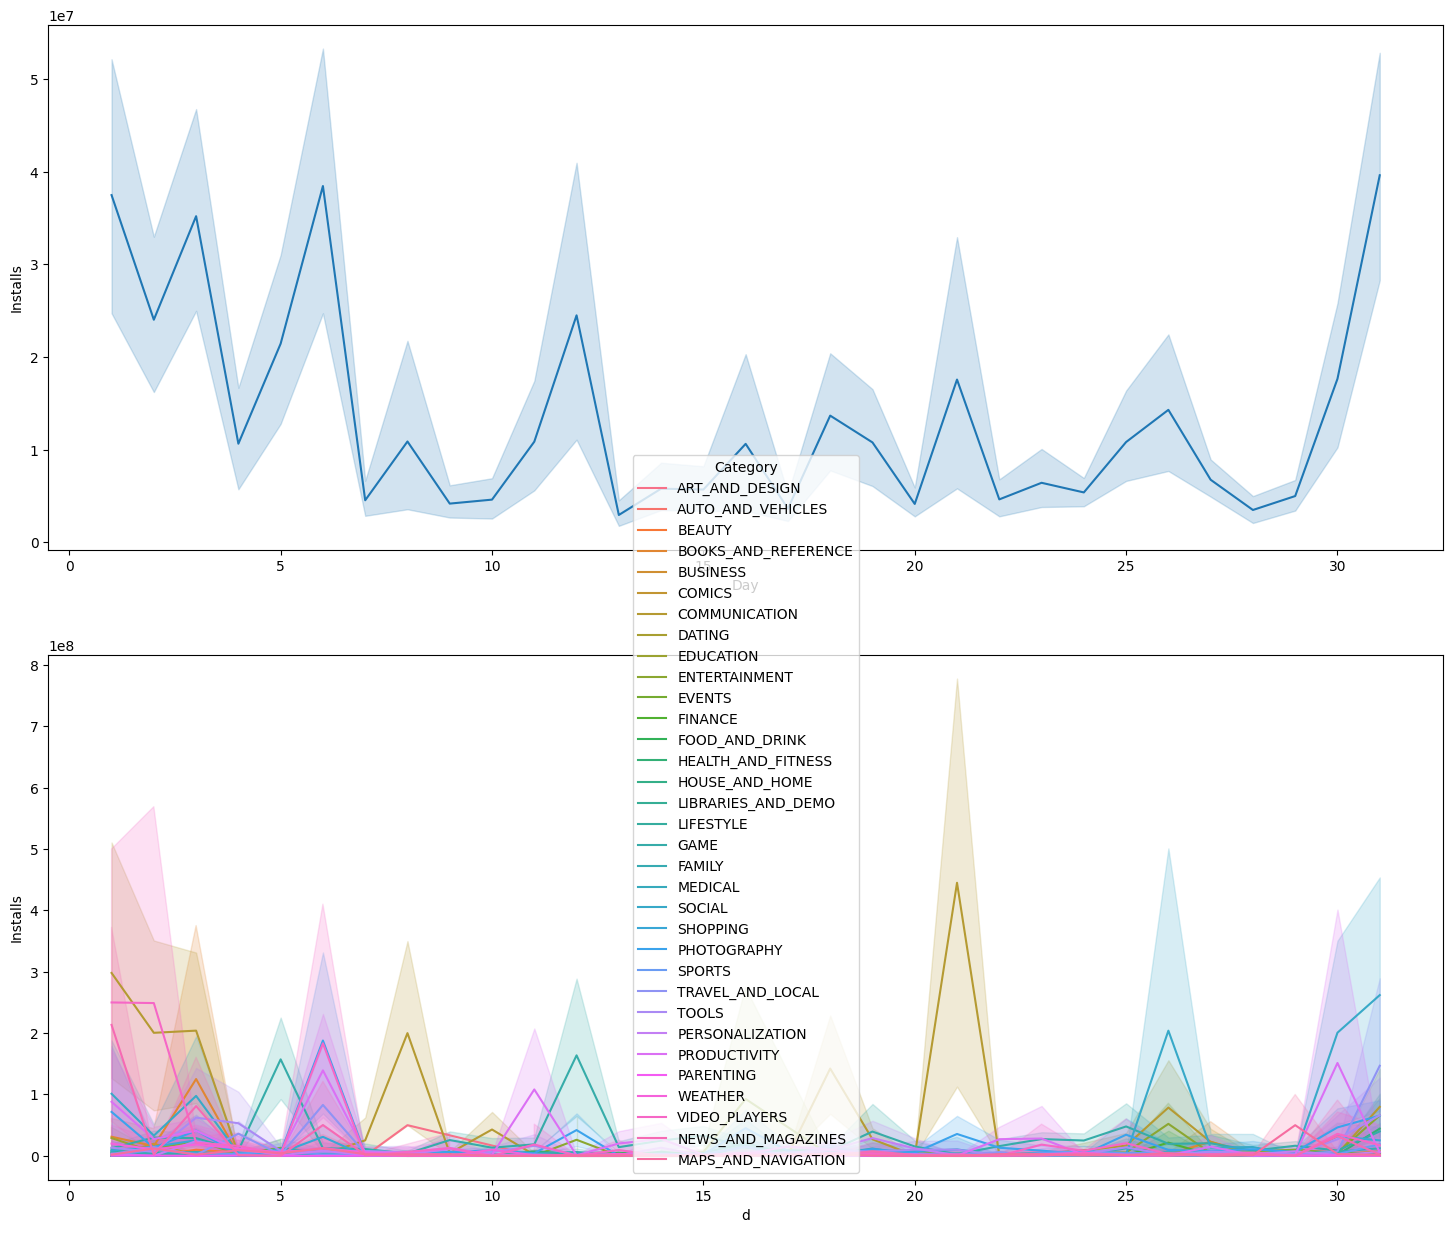

In [132]:
plt.subplots(2,1,figsize=(18,15))

# most apps updated in which day and what category apps were most updated
plt.subplot(211)
ax=sns.lineplot(df2,x='d',y='Installs')
ax.set_xlabel('Day')

# most installed apps in which day and what category
plt.subplot(212)
sns.lineplot(df2,x='d',y='Installs',hue='Category')
ax.set_xlabel('Day')

The following inferences are made based on the graphs above:

- Month 7 (July month) has the highest number of counts.(Game, communications, - - 
-  social/medical/lifestyle were the most updated apps.)
- July month has the highest number of installs also.(Communications apps were the most installed)
- So, we can launch an app in July month basically of communications and game category.
- There has been a steep rise in the number of updated apps from year 2017 to 2018.
Communication, tools , personalisation, shopping and photography apps saw a steep rise in installs/updates.
So, we can launch communications apps-
- Photography apps saw a steep rise in installs/updates.
- From the line graph of days, we see that most number of apps are updated and installed in the beginning and end of month.
Communications app was the most updated and installed.

### The final conclusion is we can launch apps related to communications category in the month of july. Also, to have more installs and reach, we can launch in the beginning of the month or the ending of the month.